In [1]:
from pyspectral.rsr_reader import RelativeSpectralResponse
import matplotlib.pyplot as plt
import numpy as np

In [2]:
seviri = RelativeSpectralResponse('Meteosat-11', 'seviri')
abi = RelativeSpectralResponse('GOES-16', 'abi')
modis = RelativeSpectralResponse('EOS-Aqua', 'modis')

No rsr file /home/anna.jungbluth/.local/share/pyspectral/rsr_seviri_Meteosat-11.h5 on disk
6kB [00:00, 1089.62kB/s]             


Text(0, 0.5, 'Spectral Response')

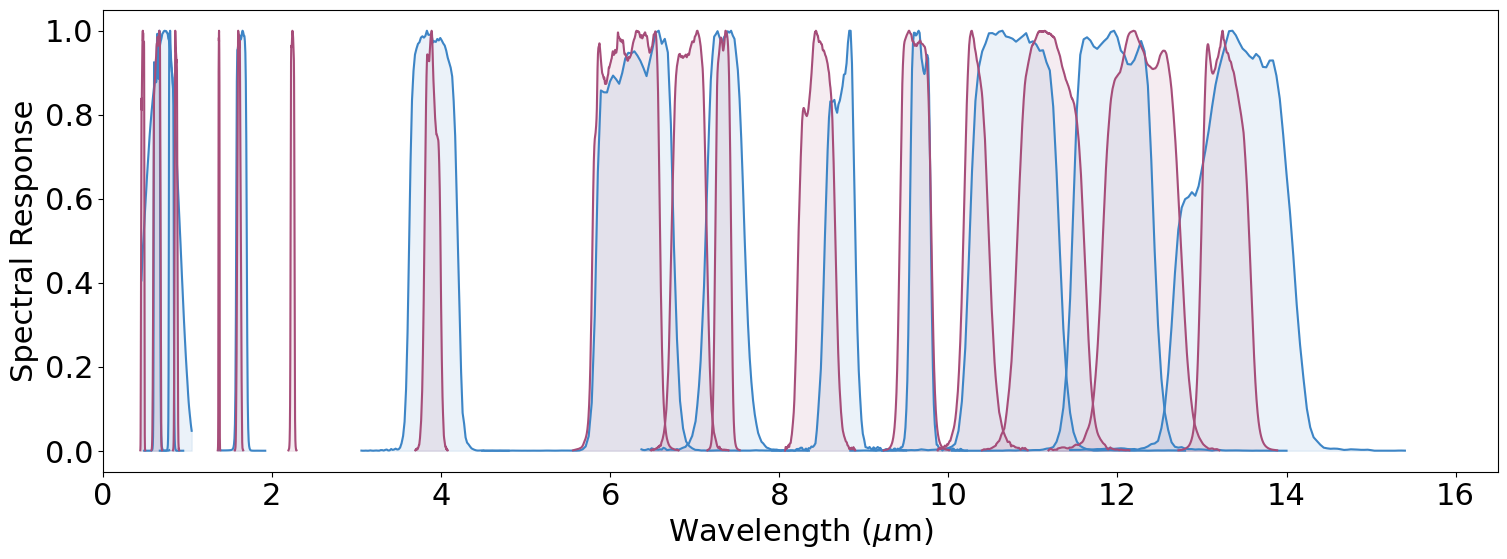

In [25]:
fontsize = 22

plt.figure(figsize=(18, 6))
for i, band in enumerate(seviri.rsr):
    for det in seviri.rsr[band]:
        if i == 0:  
            plt.plot(seviri.rsr[band][det]['wavelength'], seviri.rsr[band][det]['response'], label='MSG/SEVIRI', color='#3d85c6')
        else:
            plt.plot(seviri.rsr[band][det]['wavelength'], seviri.rsr[band][det]['response'], color='#3d85c6')
        # Fill the area below the line
        plt.fill_between(seviri.rsr[band][det]['wavelength'], seviri.rsr[band][det]['response'], color='#3d85c6', alpha=0.1)

for i, band in enumerate(abi.rsr):
    for det in abi.rsr[band]:
        if i == 0:  
            plt.plot(abi.rsr[band][det]['wavelength'], abi.rsr[band][det]['response'], label='GOES-16/ABI', color='#a64d79')
        else:
            plt.plot(abi.rsr[band][det]['wavelength'], abi.rsr[band][det]['response'], color='#a64d79')
        # Fill the area below the line
        plt.fill_between(abi.rsr[band][det]['wavelength'], abi.rsr[band][det]['response'], color='#a64d79', alpha=0.1)
        
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize)

plt.xlim(0, 16.5)

plt.xlabel(r'Wavelength ($\mu$m)', fontsize=fontsize)
plt.ylabel('Spectral Response', fontsize=fontsize)
# plt.legend(fontsize=fontsize, ncols=1, frameon=False, loc='upper right')

/var/folders/qf/2p1yg9xd5yg1vlvp4j7bv8jmxr_r7s/T/ipykernel_63915/597269917.py:4: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=-1)  # adjust space between axes


Text(0, 0.5, 'Spectral Response')

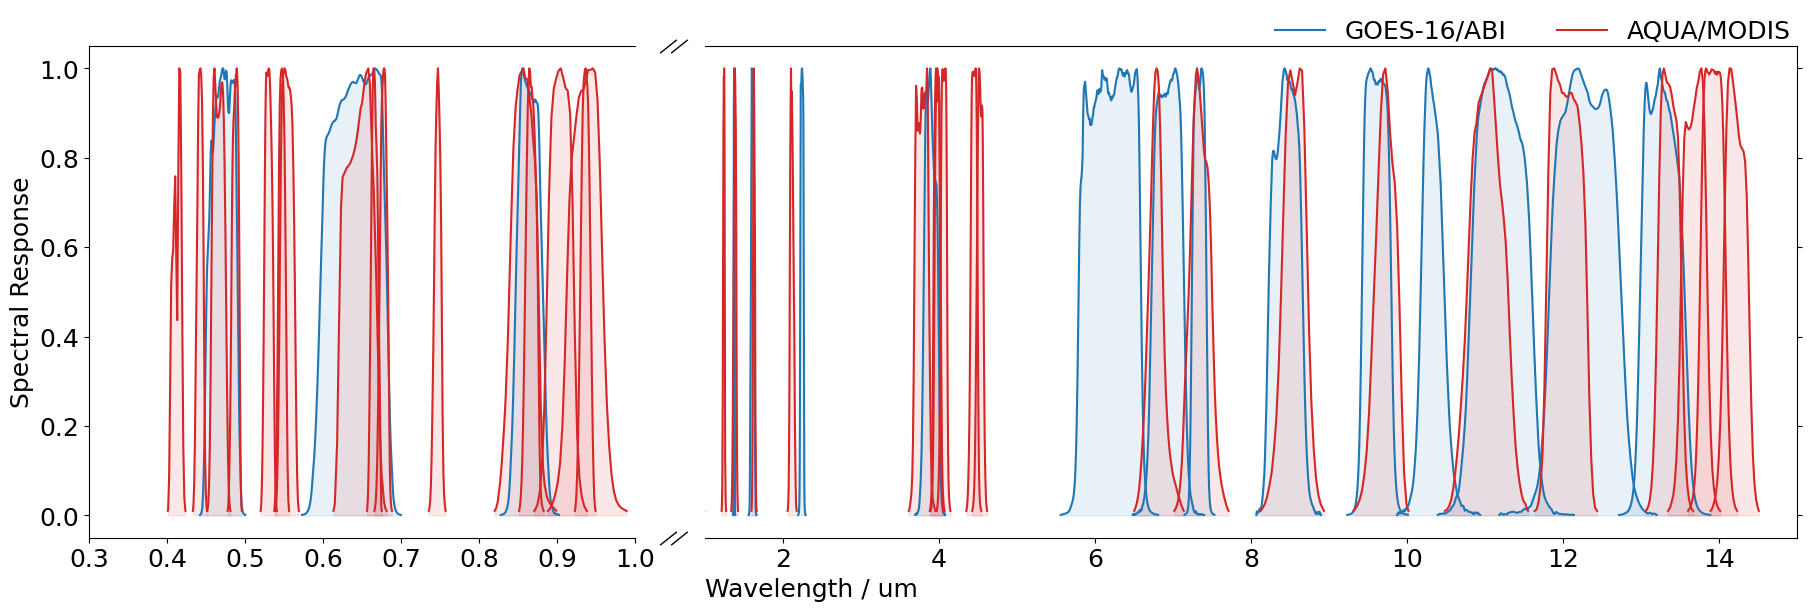

In [26]:
fontsize = 12

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18, 6), width_ratios=[2, 4], constrained_layout=True)
fig.subplots_adjust(hspace=-1)  # adjust space between axes

for i, band in enumerate(abi.rsr):
    if i == 0:  
        ax1.plot(abi.rsr[band]['det-1']['wavelength'], abi.rsr[band]['det-1']['response'], label='GOES-16/ABI', color='tab:blue')
        ax2.plot(abi.rsr[band]['det-1']['wavelength'], abi.rsr[band]['det-1']['response'], label='GOES-16/ABI', color='tab:blue')
    else:
        ax1.plot(abi.rsr[band]['det-1']['wavelength'], abi.rsr[band]['det-1']['response'], color='tab:blue')
        ax2.plot(abi.rsr[band]['det-1']['wavelength'], abi.rsr[band]['det-1']['response'], color='tab:blue')
    # Fill the area below the line
    ax1.fill_between(abi.rsr[band]['det-1']['wavelength'], abi.rsr[band]['det-1']['response'], color='tab:blue', alpha=0.1)
    ax2.fill_between(abi.rsr[band]['det-1']['wavelength'], abi.rsr[band]['det-1']['response'], color='tab:blue', alpha=0.1)

for i, band in enumerate(modis.rsr):
    if i == 0:  
        ax1.plot(modis.rsr[band]['det-1']['wavelength'], modis.rsr[band]['det-1']['response'], label='AQUA/MODIS', color='tab:red')
        ax2.plot(modis.rsr[band]['det-1']['wavelength'], modis.rsr[band]['det-1']['response'], label='AQUA/MODIS', color='tab:red')
    else:
        ax1.plot(modis.rsr[band]['det-1']['wavelength'], modis.rsr[band]['det-1']['response'], color='tab:red')
        ax2.plot(modis.rsr[band]['det-1']['wavelength'], modis.rsr[band]['det-1']['response'], color='tab:red')
    # Fill the area below the line
    ax1.fill_between(modis.rsr[band]['det-1']['wavelength'], modis.rsr[band]['det-1']['response'], color='tab:red', alpha=0.1)
    ax2.fill_between(modis.rsr[band]['det-1']['wavelength'], modis.rsr[band]['det-1']['response'], color='tab:red', alpha=0.1)
   
ax1.set_xlim(0.3, 1)  # outliers only
ax2.set_xlim(1, 15)  # most of the data

ax1.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)

ax1.tick_params(labelright=False)
ax2.tick_params(labelleft=False)  
ax2.yaxis.tick_right()

d = .8  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1.06, 1.08], [0, 0], transform=ax1.transAxes, **kwargs)
ax1.plot([1.06, 1.08], [1, 1], transform=ax1.transAxes, **kwargs)

ax1.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)

plt.legend(fontsize=18, bbox_to_anchor=[1.015, 1.1], ncols=2, frameon=False)
plt.xlabel('Wavelength / um', fontsize = 18, loc ='left')
ax1.set_ylabel('Spectral Response', fontsize = 18)